In [1]:
'''SEBASTIAN ALZATE SIERRA'''
import control as co
import matplotlib.pyplot as plt
from EP import *

# CONTROLADOR P

In [2]:
num = 0.006679
den = [1, 0.2547, 0.008125]
G = co.tf(num, den)
G

TransferFunction(array([0.006679]), array([1.      , 0.2547  , 0.008125]))

In [3]:
enjambre = Enjambre(
               n_particulas = 50,
               n_variables  = 1,
               limites_inf  = [0.001],
               limites_sup  = [1000],
               verbose      = False
            )

In [4]:
def funcion_objetivo(kp):
    num = 0.006679
    den = [1, 0.2547, 0.008125]
    G = co.tf(num, den)
    numc = [kp]
    denc = [1]
    Gc = co.tf(numc, denc)
    Gt = co.series(Gc, G)
    Gtc = co.feedback(Gt)
    data = co.step_info(Gtc)
    response = co.step_response(Gtc)
    data = co.step_info(Gtc)
    parametros = list(data.values())
    mp = float(parametros[4])
    e_ss = abs(0.8- response.outputs[-1])#ERROR EN ESTADO ESTABLE 0 Y MP REDUCCION 0.2
    return (e_ss)

In [5]:
enjambre.optimizar(
    funcion_objetivo = funcion_objetivo,
    optimizacion     = "minimizar",
    n_iteraciones    = 50,
    inercia          = 0.8, #Reduce o aumenta la velocidad de la particula recomendable entre 0.2 y 1.2
    reduc_inercia    = True,
    inercia_max      = 0.9,
    inercia_min      = 0.4,
    peso_cognitivo   = 1, #Aporta componente estocastica para escapar de minimos locales
    peso_social      = 2,
    parada_temprana  = False,
    rondas_parada    = 5,
    tolerancia_parada = 10**-3,
    verbose          = False
)

-------------------------------------------
Optimización finalizada 2023-06-09 08:49:13
-------------------------------------------
Duración optimización: 70.65424036979675
Número de iteraciones: 49
Posición óptima: [4.867931990218315]
Valor óptimo: 2.4632798967250125e-07



In [6]:
kp= 4.867931990218315
numc = [kp]
denc = [1]
Gc = co.tf(numc, denc) #FdT CONTROLADOR
Gt=co.series(Gc,G)
Gtc = co.feedback(Gt)
Gtc

TransferFunction(array([0.03251292]), array([1.        , 0.2547    , 0.04063792]))

In [7]:
data_la = co.step_info(G)
print(f'Informacion de Funcion de transferencia lazo abierto: \n {data_la}')

Informacion de Funcion de transferencia lazo abierto: 
 {'RiseTime': 59.68024589558046, 'SettlingTime': 109.83704829718532, 'SettlingMin': 0.7399180978670309, 'SettlingMax': 0.8220307692307691, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.8210379164197981, 'PeakTime': 184.75480378312676, 'SteadyStateValue': 0.8220307692307691}


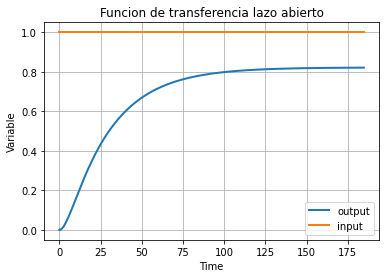

In [8]:
response = co.step_response(G)
plt.plot(response.time, response.outputs, response.time, response.inputs, linewidth = 2)
plt.title('Funcion de transferencia lazo abierto')
plt.legend(['output', 'input'])
plt.xlabel('Time')
plt.ylabel('Variable')
plt.grid()
plt.show()

# CONTROLADOR PI


In [50]:
num = 0.90888
den = [52.32874, 1]
G = co.tf(num, den)
G

TransferFunction(array([0.90888]), array([52.32874,  1.     ]))

In [51]:
data = co.step_info(G)
print(f'Informacion de Funcion de transferencia lazo abierto: \n {data}')

Informacion de Funcion de transferencia lazo abierto: 
 {'RiseTime': 113.18886898284843, 'SettlingTime': 208.12146877491486, 'SettlingMin': 0.8179920000000004, 'SettlingMax': 0.90888, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.9079711200000006, 'PeakTime': 361.4741299774837, 'SteadyStateValue': 0.90888}


In [10]:
def funcion_objetivo(K,Ti):
    num = 0.90888
    den = [52.32874, 1]
    numc = [K*Ti, Ti]
    denc = [Ti, 0]
    G = co.tf(num, den) #FdT
    Gc = co.tf(numc, denc) #CONTROLADOR
    Gt = co.series(G, Gc) #FdT SERIE CON CONTROLADOR
    Gtc = co.feedback(Gt) #REALIMENTAR SISTEMA
    response = co.step_response(Gtc) #RESPUESTA ESCALON SISTEMA
    data = co.step_info(Gtc)
    parametros = list(data.values())
    mp = float(parametros[4])
    tss = float(parametros[1])
    #e= sum(abs(response.inputs - response.outputs))
    e = abs(tss-90)
    return e

In [52]:
enjambre = Enjambre(
               n_particulas = 50,
               n_variables  = 2,
               limites_inf  = [0, 0.0001],
               limites_sup  = [1000, 5],
               verbose      = False
            )

In [53]:
enjambre.optimizar(
    funcion_objetivo = funcion_objetivo,
    optimizacion     = "minimizar",
    n_iteraciones    = 50,
    inercia          = 0.8, #Reduce o aumenta la velocidad de la particula recomendable entre 0.2 y 1.2
    reduc_inercia    = True,
    inercia_max      = 0.9,
    inercia_min      = 0.4,
    peso_cognitivo   = 1, #Aporta componente estocastica para escapar de minimos locales
    peso_social      = 2,
    parada_temprana  = False,
    rondas_parada    = 5,
    tolerancia_parada = 10**-3,
    verbose          = False
)

-------------------------------------------
Optimización finalizada 2023-06-07 16:47:06
-------------------------------------------
Duración optimización: 49.02535104751587
Número de iteraciones: 49
Posición óptima: [262.47527352069653 0.03919701910709479]
Valor óptimo: 5.496491072287668e-07



In [55]:
kp=262.47527352069653 
ti=0.03919701910709479
numc = [kp*ti, ti]
denc = [ti, 0]
Gc = co.tf(numc, denc)
Gt = co.series(G, Gc) 
Gtc = co.feedback(Gt) #Controlador realimentado
data3 = co.step_info(Gtc) #Informacion Controlador realimentado
print(f'Informacion de Funcion de transferencia realimentada con controlador: \n {data3}')

Informacion de Funcion de transferencia realimentada con controlador: 
 {'RiseTime': 0.48813589133510904, 'SettlingTime': 0.9000005496491073, 'SettlingMin': 0.9037082573334498, 'SettlingMax': 1.0, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.995672042827078, 'PeakTime': 1.5101704138179937, 'SteadyStateValue': 1.0}


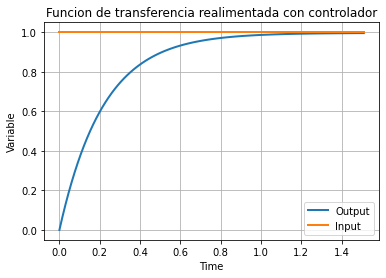

In [56]:
response_controlador = co.step_response(Gtc) #Step Controlador

plt.plot(response_controlador.time, response_controlador.outputs, 
    response_controlador.time, response_controlador.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada con controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['Output', 'Input'])
plt.grid()


# CONTROLADOR PID

In [58]:
num = 0.006679
den = [1, 0.2547, 0.008125]
G = co.tf(num, den)
G

TransferFunction(array([0.006679]), array([1.      , 0.2547  , 0.008125]))

In [59]:
data_la = co.step_info(G)
print(f'Informacion de Funcion de transferencia lazo abierto: \n {data_la}')
parametros=list(data_la)

Informacion de Funcion de transferencia lazo abierto: 
 {'RiseTime': 59.68024589558046, 'SettlingTime': 109.83704829718532, 'SettlingMin': 0.7399180978670309, 'SettlingMax': 0.8220307692307691, 'Overshoot': 0, 'Undershoot': 0, 'Peak': 0.8210379164197981, 'PeakTime': 184.75480378312676, 'SteadyStateValue': 0.8220307692307691}


In [60]:
def funcion_objetivo(kp, ki, kd):
    num = 0.006679
    den = [1, 0.2547, 0.008125]
    G = co.tf(num, den)
    numc = [kd,  kp, ki]
    denc = [1, 0]
    Gc = co.tf(numc, denc)
    Gt = co.series(Gc, G)
    Gtc = co.feedback(Gt)
    data = co.step_info(Gtc)
    parametros = list(data.values())
    tss = float(parametros[1])
    mp = float(parametros[4])
    response = co.step_response(Gtc)
    #e_abs = sum(abs(response.inputs - response.outputs))
    e_ss = abs(1 - response.outputs[-1]) #Error estado estable
    e = abs(90 - tss) + abs(1.1 - mp) + e_ss #MP 10% TSS REDUC 10%
    return e

In [61]:
enjambre = Enjambre(
               n_particulas = 100,
               n_variables  = 3,
               limites_inf  = [0.001, 0.01, 0.001],
               limites_sup  = [10, 0.8, 0.8],
               verbose      = False
            )

In [62]:
enjambre.optimizar(
    funcion_objetivo = funcion_objetivo,
    optimizacion     = "minimizar",
    n_iteraciones    = 50,
    inercia          = 0.8, #Reduce o aumenta la velocidad de la particula recomendable entre 0.2 y 1.2
    reduc_inercia    = True,
    inercia_max      = 0.9,
    inercia_min      = 0.4,
    peso_cognitivo   = 1, #Aporta componente estocastica para escapar de minimos locales
    peso_social      = 2,
    parada_temprana  = False,
    rondas_parada    = 5,
    tolerancia_parada = 10**-3,
    verbose          = False
)

-------------------------------------------
Optimización finalizada 2023-06-07 16:52:23
-------------------------------------------
Duración optimización: 160.24836564064026
Número de iteraciones: 49
Posición óptima: [5.249971318219572 0.10860129539639368 0.001]
Valor óptimo: 0.0509755202027562



In [63]:
kp = 5.249971318219572 
ti= 0.10860129539639368 
td= 0.001
numc = [td,  kp, ti]
denc = [1, 0]
Gc = co.tf(numc, denc)
Gt = co.series(Gc, G)
Gtc = co.feedback(Gt)
data_controlador = co.step_info(Gtc)
print(f'Informacion de Funcion de transferencia controlador: \n {data_controlador}')

Informacion de Funcion de transferencia controlador: 
 {'RiseTime': 10.51708157978984, 'SettlingTime': 89.97947573820196, 'SettlingMin': 0.9152350909810457, 'SettlingMax': 1.0113034436266204, 'Overshoot': 1.130344362662039, 'Undershoot': 0, 'Peak': 1.0113034436266204, 'PeakTime': 19.86559853960303, 'SteadyStateValue': 1.0}


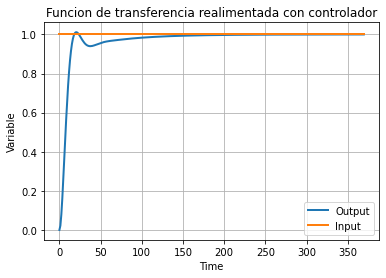

In [64]:
response_controlador = co.step_response(Gtc)
plt.plot(response_controlador.time, response_controlador.outputs, 
response_controlador.time, response_controlador.inputs, linewidth = 2)
plt.title('Funcion de transferencia realimentada con controlador')
plt.xlabel('Time')
plt.ylabel('Variable')
plt.legend(['Output', 'Input'])
plt.grid()
plt.show()